# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [18]:
import matplotlib.pyplot as plt
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
samples = np.random.normal(mu,sigma,size=100000)
x_theor, y_theor = ecdf(samples)
x,y=ecdf(df['temperature'])

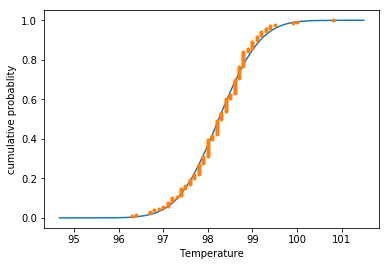

In [109]:
plt.plot(x_theor, y_theor)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('cumulative probablity')
plt.show()

### Problem 1
#### The empirical cdf of the observed data is close to the cdf of the normal probability distribution. This show that the data is normally distributed.

In [130]:
#data = df['temperature']
#scipy.stats.chi2_contingency(data)

### Problem 3
#### Bootstrap hypothesis test


In [95]:
np.random.seed(42)
data = df['temperature']
bs_mean =np.empty(1000)
for i in range(1000):
    resample_data = np.random.choice(data, size=130)
    bs_mean[i] = np.mean(resample_data)

In [36]:
np.percentile(bs_mean,[2.5,97.5])

array([ 98.11844231,  98.36923077])

#### The 95% interval does not include 98.6. This makes it unlikely to be the mean body temperature.

In [96]:
obs_mean = np.mean(data)
obs_mean

98.24923076923078

In [110]:
p_value = np.sum(bs_mean == 98.6)/len(bs_mean)
print(p_value)

0.0


#### Testing the null hypothesis that mean equals to 98.6 returns p value of 0. Which means we can reject this hypothesi

### One sample t-test (two-tailed) 
#### H${_o}$: ${mu}$ = 98.6 

In [54]:
import scipy
from scipy import stats
scipy.stats.ttest_1samp(data, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

#### Returns extremely small p_value(2.41e-07) so we can reject this null hypothesis at 95% confidence interval.

### One sample Z-test (two-tailed)

 H${_o}$: mu = 98.6 


In [128]:
sig = np.std(data)
q = 98.6
z = (q-obs_mean)/(sig/np.sqrt(len(data)))
p_val = 2*stats.norm.pdf(z)
print(z,p_val)

5.47592520208 2.45819143107e-07


#### Returns extremely small p_value(2.45e-07) so we can reject this null hypothesis at 95% confidence interval.
Here t-test is appropriate as populaton standard deviation is not known


### Problem 4
#### One sample t test two tailed
H${_o}$: mu = 98.6 

In [94]:
sub_data = np.random.choice(data, size=10)
scipy.stats.ttest_1samp(sub_data, 98.6)

Ttest_1sampResult(statistic=-3.3924695367123507, pvalue=0.0079678489610927137)

In [129]:
q = 98.6
z = (q-obs_mean)/(np.std(sub_data)/np.sqrt(len(sub_data)))
p_val =2*(stats.norm.pdf(z))
print(z,p_val)

3.68924311215 0.000884004218825


Here the t test is more appropriate due to small sample size. 
The results for both t and z test are same i.e. null hyporthesis can be rejected

### Problem 5

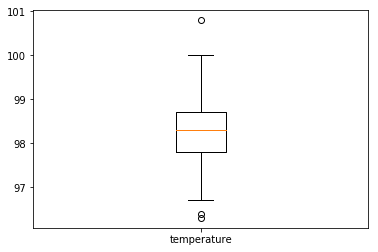

In [106]:
plt.boxplot(data, bootstrap=1000, labels=['temperature'])
plt.show()

In [152]:
ci = np.percentile(data,[2.5,97.5])
ME = 1.96/np.sqrt(130)
print(ci)
print (ME)

[ 96.7225  99.4775]
0.171903371784


Here the box plot shows the outliers as the circles. 
The 95% cofidence interval shows that any temperature below 96.7 and above 99.47 should be considered abnormal 
with margin of error of 0.17

### Problem 6

In [98]:
## Bootsrapping approach
data_male = df[df.gender == 'M']['temperature']
data_female = df[df.gender == 'F']['temperature']
male_mean = np.empty(10000)
female_mean = np.empty(10000)
for i in range(10000):
    male_data = np.random.choice(data, size=len(data_male))
    female_data = np.random.choice(data, size=len(data_female))
    male_mean[i] = np.mean(male_data)
    female_mean[i] = np.mean(female_data)
male_mean_interval = np.percentile(male_mean,[2.5, 97.5])    
female_mean_interval = np.percentile(female_mean,[2.5, 97.5])
print(np.sum(male_mean == female_mean)/len(data))
print(male_mean_interval,female_mean_interval)

0.192307692308
[ 98.07230769  98.42773077] [ 98.07076923  98.42461538]


In [77]:
##Frequentist approach
scipy.stats.ttest_ind(data_male, data_female)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [90]:
x1 = np.mean(data_male)
x2 = np.mean(data_female)
sigma1 = np.std(data_male)
sigma2 = np.std(data_female)
n1 = len(data_male)
n2 = len(data_female)
denom = np.sqrt((sigma1**2)/n1+(sigma2**2)/n2)
num = x1-x2
z = num/denom
print(z)
print(2*stats.norm.pdf(z))

-2.30322028919
0.0562357162812


There is no significant difference in normal male temperature and female temperature. To test this bootstrapping method was applied. 1000 replicates of mean male temperature and female temperature were obtained. The replicates were used to test the null hypothesis that the mean male temperature equals mean female temperature. The p-value from the test was 0.19 which means that the null hypothesis cannot be rejected.

The t-test and z test were employed to test the null hypothesis that normal male temperature equals normal female temperature. The t-test returned p-value of 0.023 and z-test value retured p-value of 0.056. Hence null hypothesis cannot be rejected at cofidence level of 95%.

These test approches were used under the assuption of independent normally distributed continuous data.

In conclusion, the analysis shows that normal temperature of human body is  not 98.6C. Also, there is no significant difference between male body temperature and female body temperature.